In [407]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv


In [408]:
import pandas as pd
print (pd.__version__)

2.2.3


loading dataset 

In [409]:
df=pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

showing data description

In [410]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


desplying first 5 rows of ds

In [411]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


after loading data we can start by the second step which is cleaning data 

2-data cleaning 
starting by checking the null values 

In [412]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

dropping 3 features with missing values

In [413]:
# Drop the three features from the dataset
df = df.drop(['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'], axis=1)

checking for duplicates in the dataset 

In [414]:
print("Number of duplicate rows:", df.duplicated().sum())
# Remove duplicates if any
df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


checking datatypes of dataset 

In [415]:
print(df.dtypes)

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Gender                        object
Exam_Score                     int64
dtype: object


a cell to know all the categorical features 

In [416]:
# Select categorical columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns
print("Categorical features:")
print(categorical_features.tolist())

Categorical features:
['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Gender']


###########################

hey i found that we have to encode all the non numerical features to help the model take more signs for prediction and to increase the correlation between the features which helps the model to predict better as there's a linear correlation , encoded all except the 3 features which have missing values 

In [417]:
from sklearn.preprocessing import OrdinalEncoder #importing sklearn and the ordinal encoding functions from it 

the Define of categorical features that will be encoded as an ordinal encoding

In [418]:
# the ordinal columns 
ordinal_cols = [
    'Parental_Involvement',
    'Access_to_Resources',
    'Motivation_Level',
    'Family_Income',
    'Peer_Influence', 
]

the features that will be one hot encoded

In [419]:
# the one-hot columns 
onehot_cols = [
    'Extracurricular_Activities',
    'Internet_Access',
    'School_Type',
    'Learning_Disabilities',
    'Gender'
]

Define the order for ordinal columns

In [420]:
ordinal_categories = [
    ['Low', 'Medium', 'High'],       # Parental_Involvement
    ['Low', 'Medium', 'High'],       # Access_to_Resources (fixed!)
    ['Low', 'Medium', 'High'],       # Motivation_Level
    ['Low', 'Medium', 'High'],       # Family_Income
    ['Negative', 'Neutral', 'Positive'] # Peer_Influence
]

Apply ordinal encoding

In [421]:
oe = OrdinalEncoder(categories=ordinal_categories)
df[ordinal_cols] = oe.fit_transform(df[ordinal_cols])

Apply one-hot encoding ,using get dummies to convert datatypes to numerical

In [422]:
df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

fixing thee boolian thing to be 0/1 #there are features encoded as true /false we modify to be 0/1 so the model understands 

In [423]:
# Convert boolean columns (True/False) to integers (0/1)
df = df.astype(int)

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Peer_Influence,Physical_Activity,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Learning_Disabilities_Yes,Gender_Male
0,23,84,0,2,7,73,0,0,0,2,3,67,0,1,1,0,1
1,19,64,0,1,8,59,0,2,1,0,4,61,0,1,1,0,0
2,24,98,1,1,7,91,1,2,1,1,4,74,1,1,1,0,1
3,29,89,0,1,8,98,1,1,1,0,4,71,1,1,1,0,1
4,19,92,1,1,6,65,1,3,1,1,4,70,1,1,1,0,0


splitting data to x / y , x carries all featuers except the target , y carries the target 

In [424]:
# Keep only numeric features
X = df.drop("Exam_Score", axis=1) #keeping all features except target 
# Target column
y = df['Exam_Score']


quick check

In [425]:
print("X shape:", X.shape)
print("y shape:", y.shape)
X.head()
#print("the y is :",y.head())

X shape: (6607, 16)
y shape: (6607,)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Peer_Influence,Physical_Activity,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Learning_Disabilities_Yes,Gender_Male
0,23,84,0,2,7,73,0,0,0,2,3,0,1,1,0,1
1,19,64,0,1,8,59,0,2,1,0,4,0,1,1,0,0
2,24,98,1,1,7,91,1,2,1,1,4,1,1,1,0,1
3,29,89,0,1,8,98,1,1,1,0,4,1,1,1,0,1
4,19,92,1,1,6,65,1,3,1,1,4,1,1,1,0,0


OUTLIERS 
lets see the outliers values

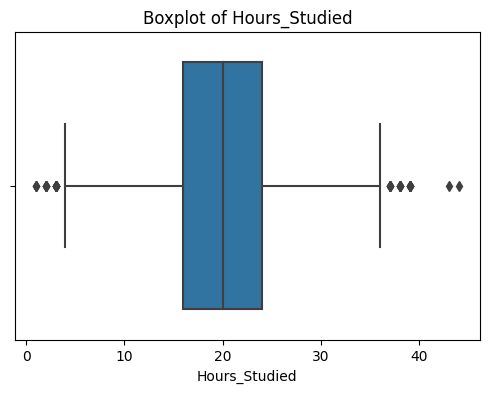

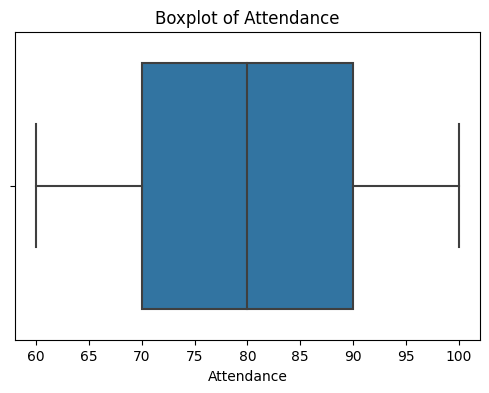

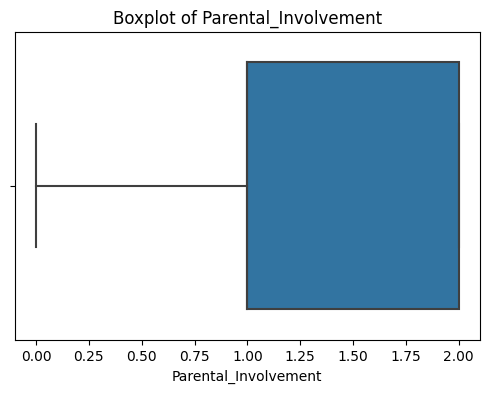

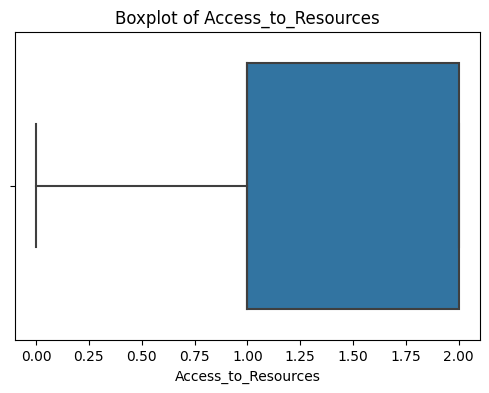

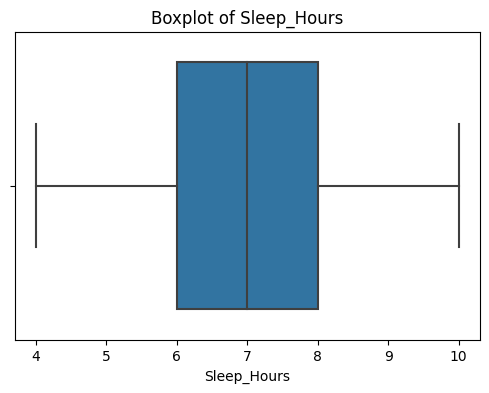

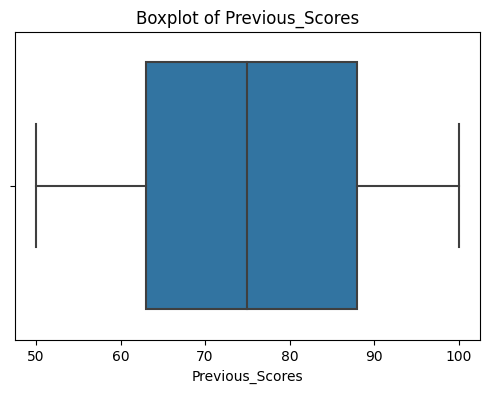

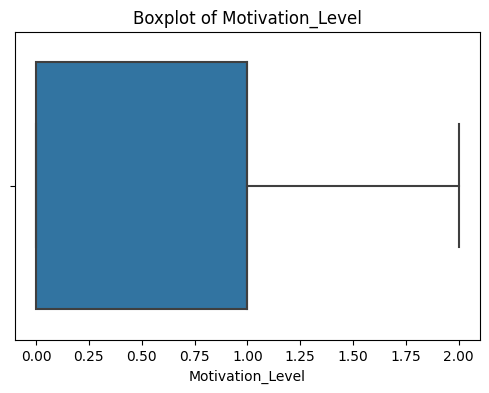

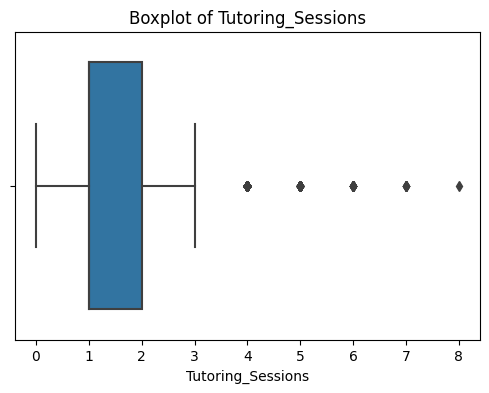

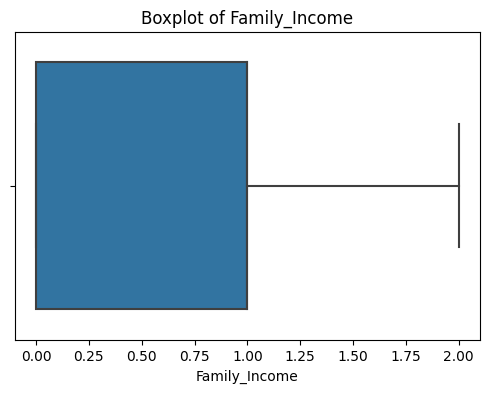

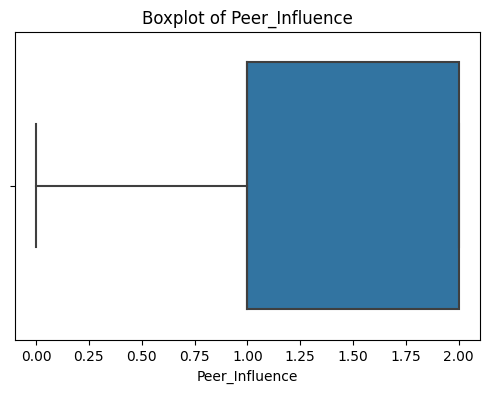

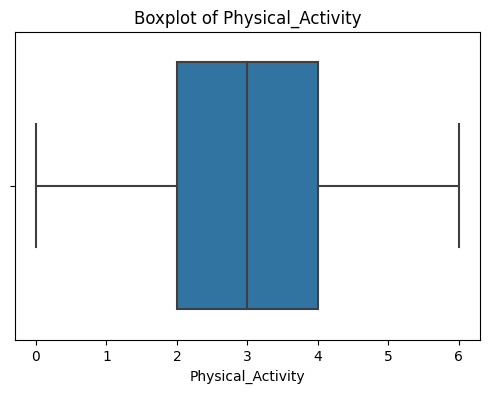

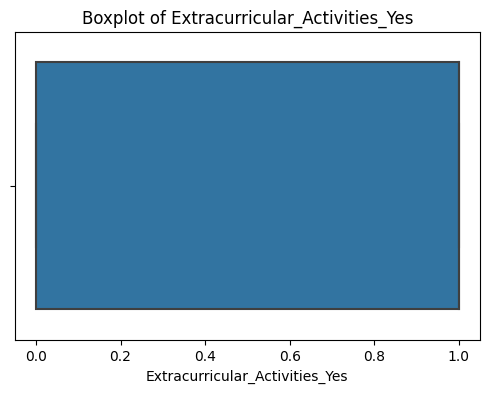

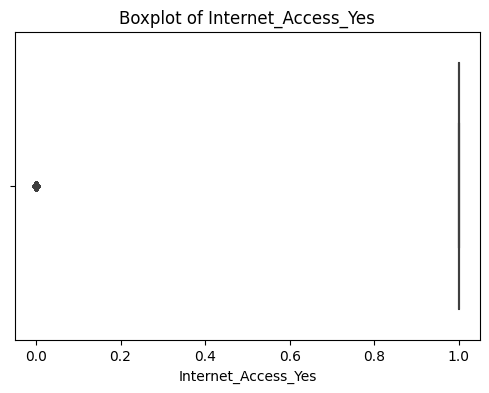

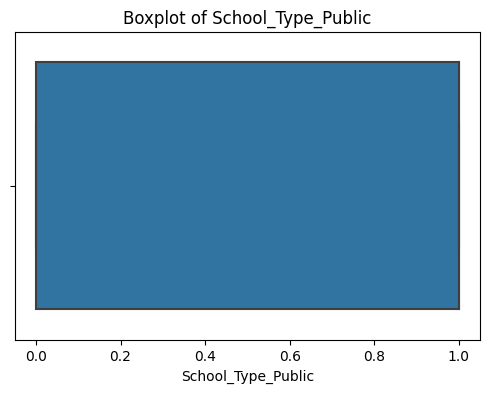

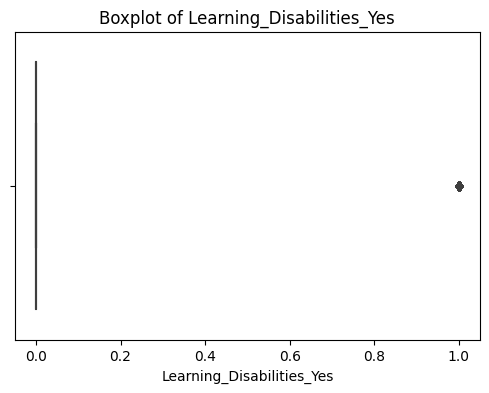

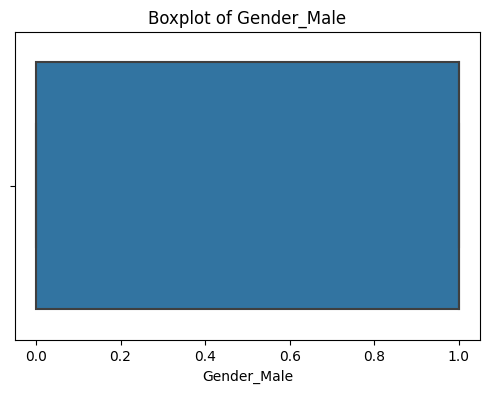

In [426]:
import matplotlib.pyplot as plt
import seaborn as sns # its a library inside matplotlib it can show a graphical statistical graph


for col in X.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=X[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

lets check the scale of the vlaues of each feature to determine if we need to standraize scaling or not 

In [427]:
# Check the min, max, mean, std of each feature
print(X.describe())


       Hours_Studied   Attendance  Parental_Involvement  Access_to_Resources  \
count    6607.000000  6607.000000           6607.000000          6607.000000   
mean       19.975329    79.977448              1.086423             1.100197   
std         5.990594    11.547475              0.695521             0.698347   
min         1.000000    60.000000              0.000000             0.000000   
25%        16.000000    70.000000              1.000000             1.000000   
50%        20.000000    80.000000              1.000000             1.000000   
75%        24.000000    90.000000              2.000000             2.000000   
max        44.000000   100.000000              2.000000             2.000000   

       Sleep_Hours  Previous_Scores  Motivation_Level  Tutoring_Sessions  \
count   6607.00000      6607.000000       6607.000000        6607.000000   
mean       7.02906        75.070531          0.906463           1.493719   
std        1.46812        14.399784          0.6957

after fouding that the scaling of the features is not the same we gonna do scale it all on the same scale 

first starting by importing sklearn framework then the standerd scaler so we can do standraization

In [428]:
import sklearn 
from sklearn.preprocessing import StandardScaler

List your binary features (already 0/1, don't scale) , we gotta keep the binary features untouched 

In [429]:
binary_features = [
    "Extracurricular_Activities_Yes",
    "Internet_Access_Yes",
    "School_Type_Public",
    "Learning_Disabilities_Yes",
    "Gender_Male"
]

List ordinal/continuous features (should be scaled)

In [430]:
ordinal_features = [
    "Hours_Studied",
    "Attendance",
    "Parental_Involvement",
    "Access_to_Resources",
    "Sleep_Hours",
    "Previous_Scores",
    "Motivation_Level",
    "Tutoring_Sessions",
    "Family_Income",
    "Peer_Influence",
    "Physical_Activity"
]

Build ColumnTransformer

In [431]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("scale_ord", StandardScaler(), ordinal_features),
        ("keep_bin", "passthrough", binary_features)
    ]
)

Fit and transform X

In [432]:
X_scaled = preprocessor.fit_transform(X)


Convert back to DataFrame

In [433]:
X_scaled = pd.DataFrame(X_scaled, columns=ordinal_features + binary_features)

In [434]:
print(X_scaled.head())

   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0       0.504942    0.348375             -1.562146             1.288574   
1      -0.162822   -1.383736             -1.562146            -0.143488   
2       0.671882    1.560853             -0.124267            -0.143488   
3       1.506587    0.781403             -1.562146            -0.143488   
4      -0.162822    1.041220             -0.124267            -0.143488   

   Sleep_Hours  Previous_Scores  Motivation_Level  Tutoring_Sessions  \
0    -0.019796        -0.143800         -1.302866          -1.213934   
1     0.661399        -1.116110         -1.302866           0.411451   
2    -0.019796         1.106313          0.134442           0.411451   
3     0.661399         1.592469          0.134442          -0.401242   
4    -0.700990        -0.699406          0.134442           1.224144   

   Family_Income  Peer_Influence  Physical_Activity  \
0      -1.060721        1.070550           0.031411   
1     

In [435]:
#old
#scaler.fit(X)

#OLD transform the training set 

In [436]:
#OLDX_scaled = scaler.transform(X)

In [437]:
#OLD print(X_scaled)
#OLD print(X_scaled.shape)

better / readable visualizing 

In [438]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.head())

   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0       0.504942    0.348375             -1.562146             1.288574   
1      -0.162822   -1.383736             -1.562146            -0.143488   
2       0.671882    1.560853             -0.124267            -0.143488   
3       1.506587    0.781403             -1.562146            -0.143488   
4      -0.162822    1.041220             -0.124267            -0.143488   

   Sleep_Hours  Previous_Scores  Motivation_Level  Tutoring_Sessions  \
0    -0.019796        -0.143800         -1.302866          -1.213934   
1     0.661399        -1.116110         -1.302866           0.411451   
2    -0.019796         1.106313          0.134442           0.411451   
3     0.661399         1.592469          0.134442          -0.401242   
4    -0.700990        -0.699406          0.134442           1.224144   

   Family_Income  Peer_Influence  Physical_Activity  \
0      -1.060721        1.070550           0.031411   
1     

lets move on 
3-BASEC VISUALIZATION TO UNDERSTAND THE DATASET

starting by visualizing by the kda type 

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



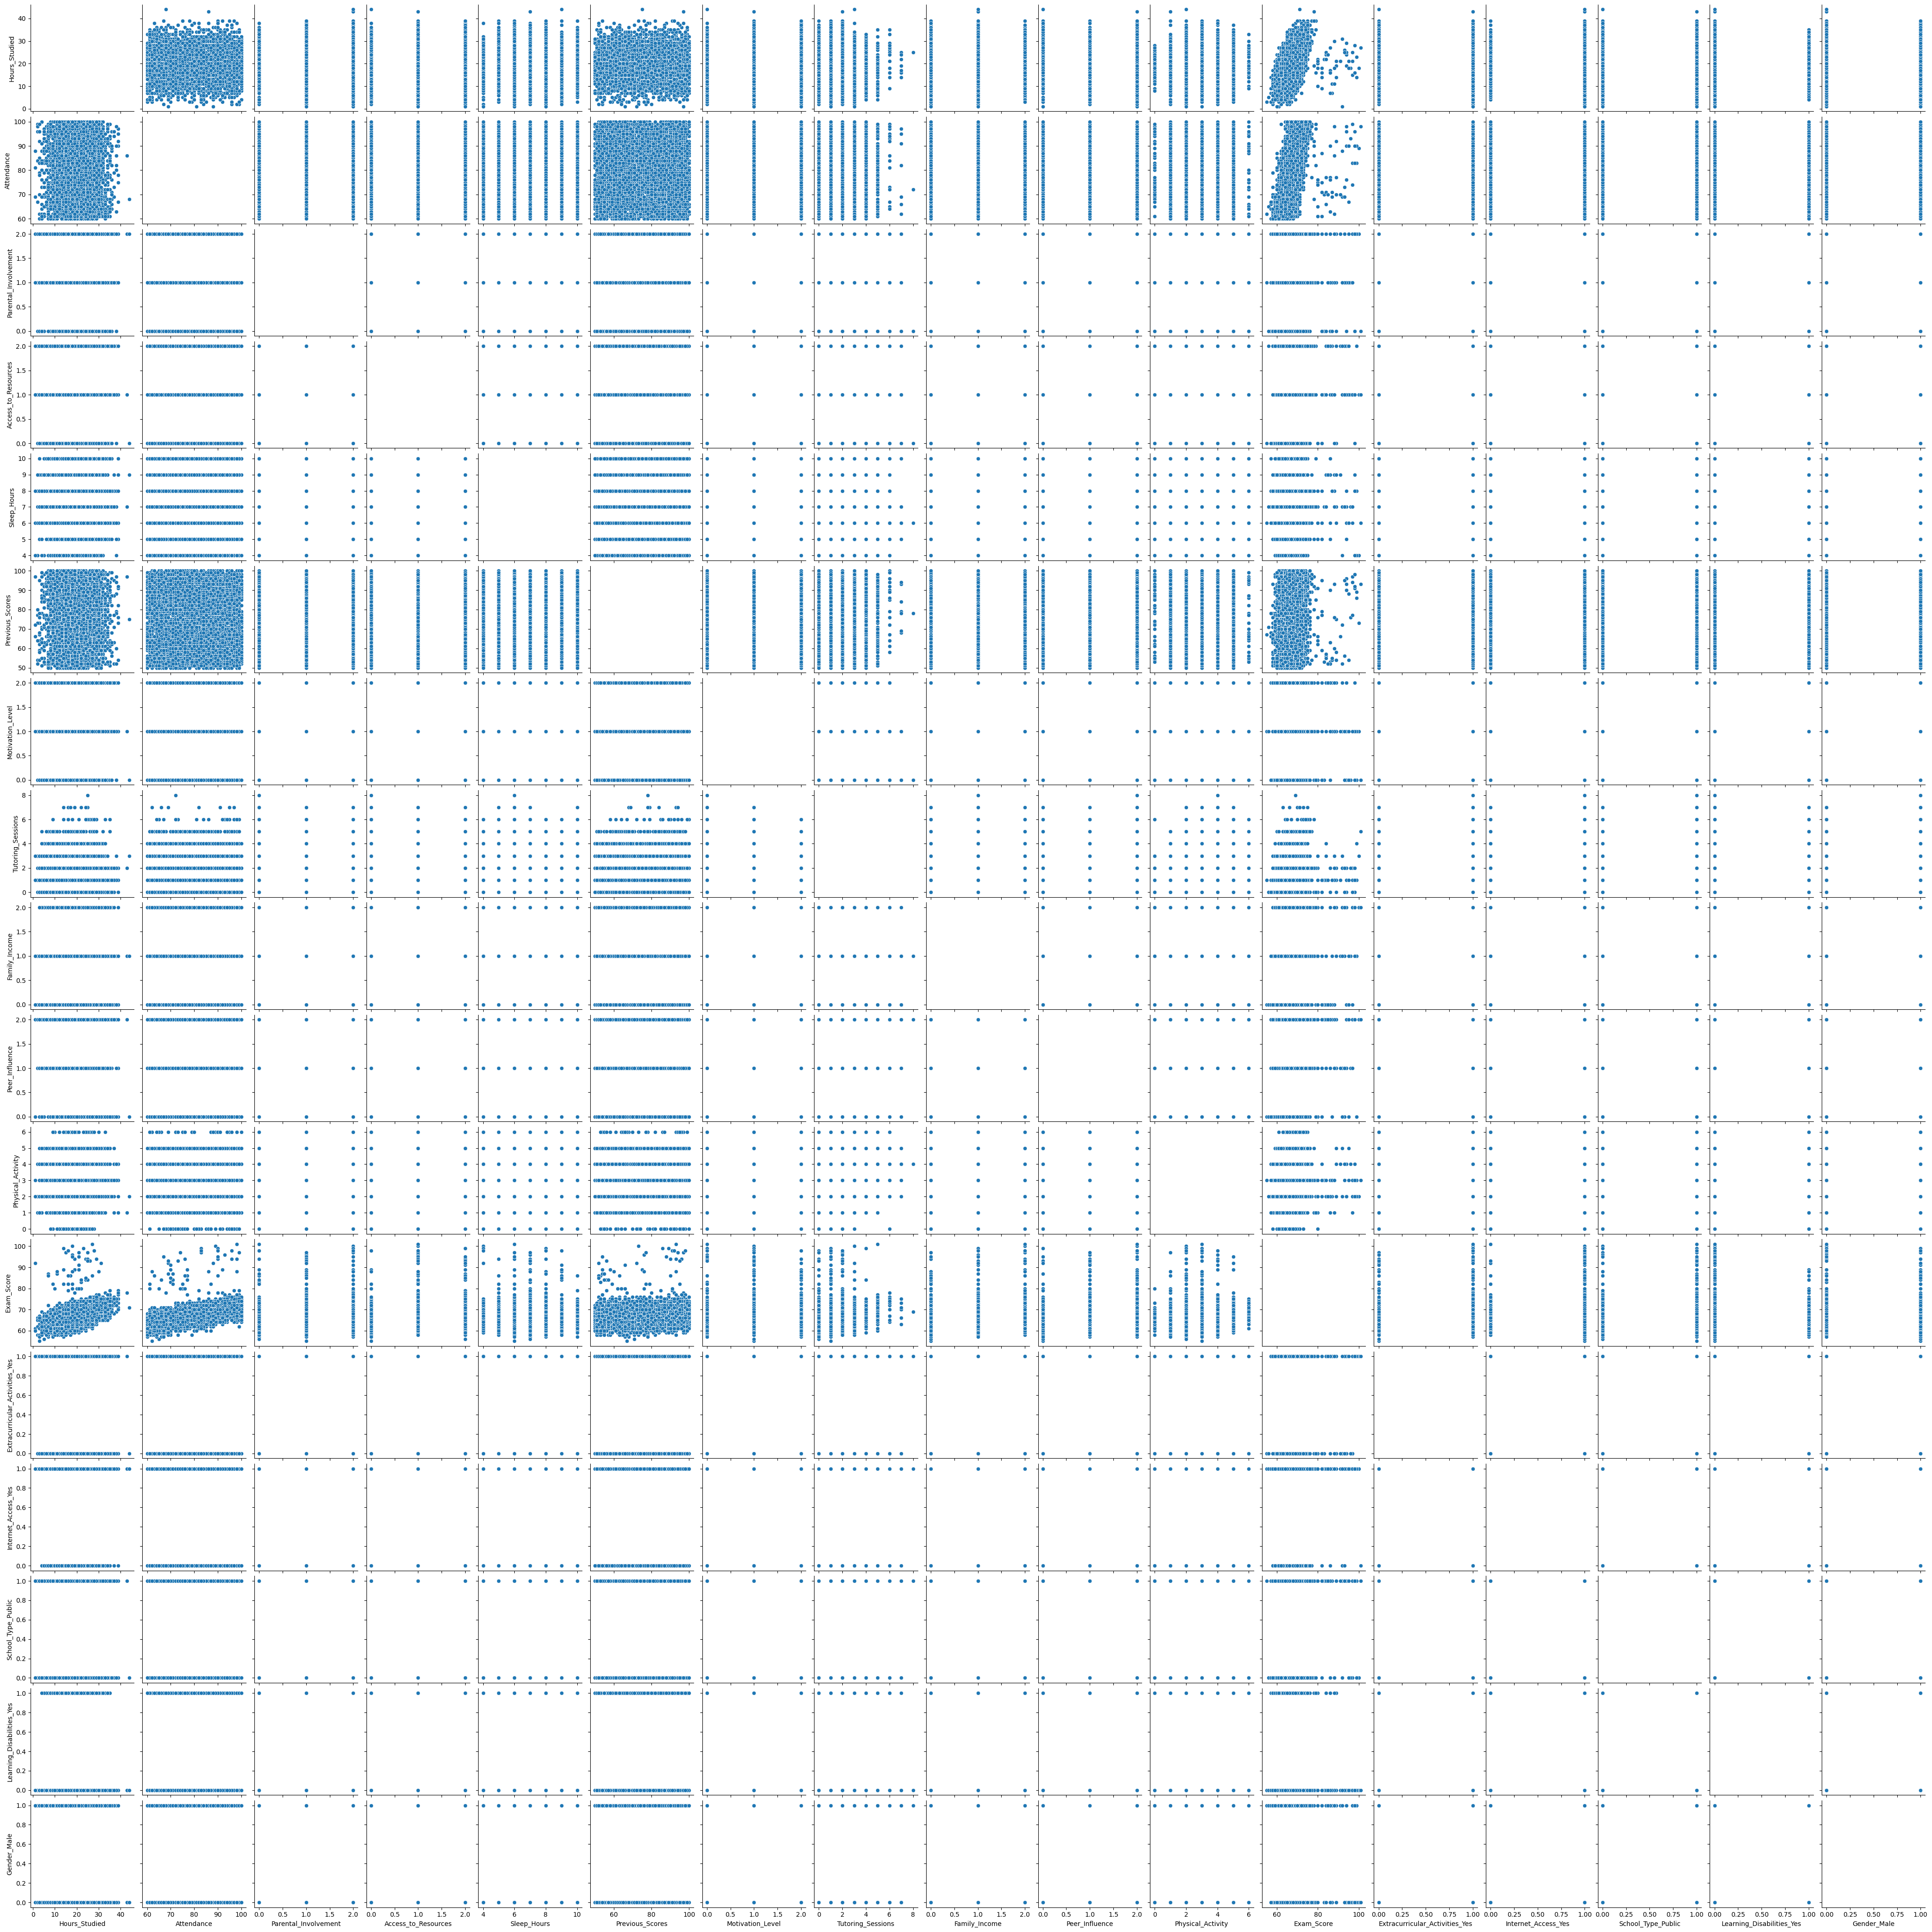

In [439]:
sns.pairplot(df,diag_kind='kda')
plt.show()

the tree map visualization 

In [440]:
import plotly.express as px

# Example: Visualize Hours_Studied grouped by Parental_Involvement
fig = px.treemap(df, 
                 path=['Parental_Involvement'], 
                 values='Hours_Studied',
                 title='Hours Studied by Parental Involvement')
fig.show()


checking the scatter plot over the df all colummns

In [441]:
# import matplotlib.pyplot as plt

# Create pairwise scatter plots for all numeric columns
# sns.pairplot(df)
# plt.show()


checking different diagram type 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

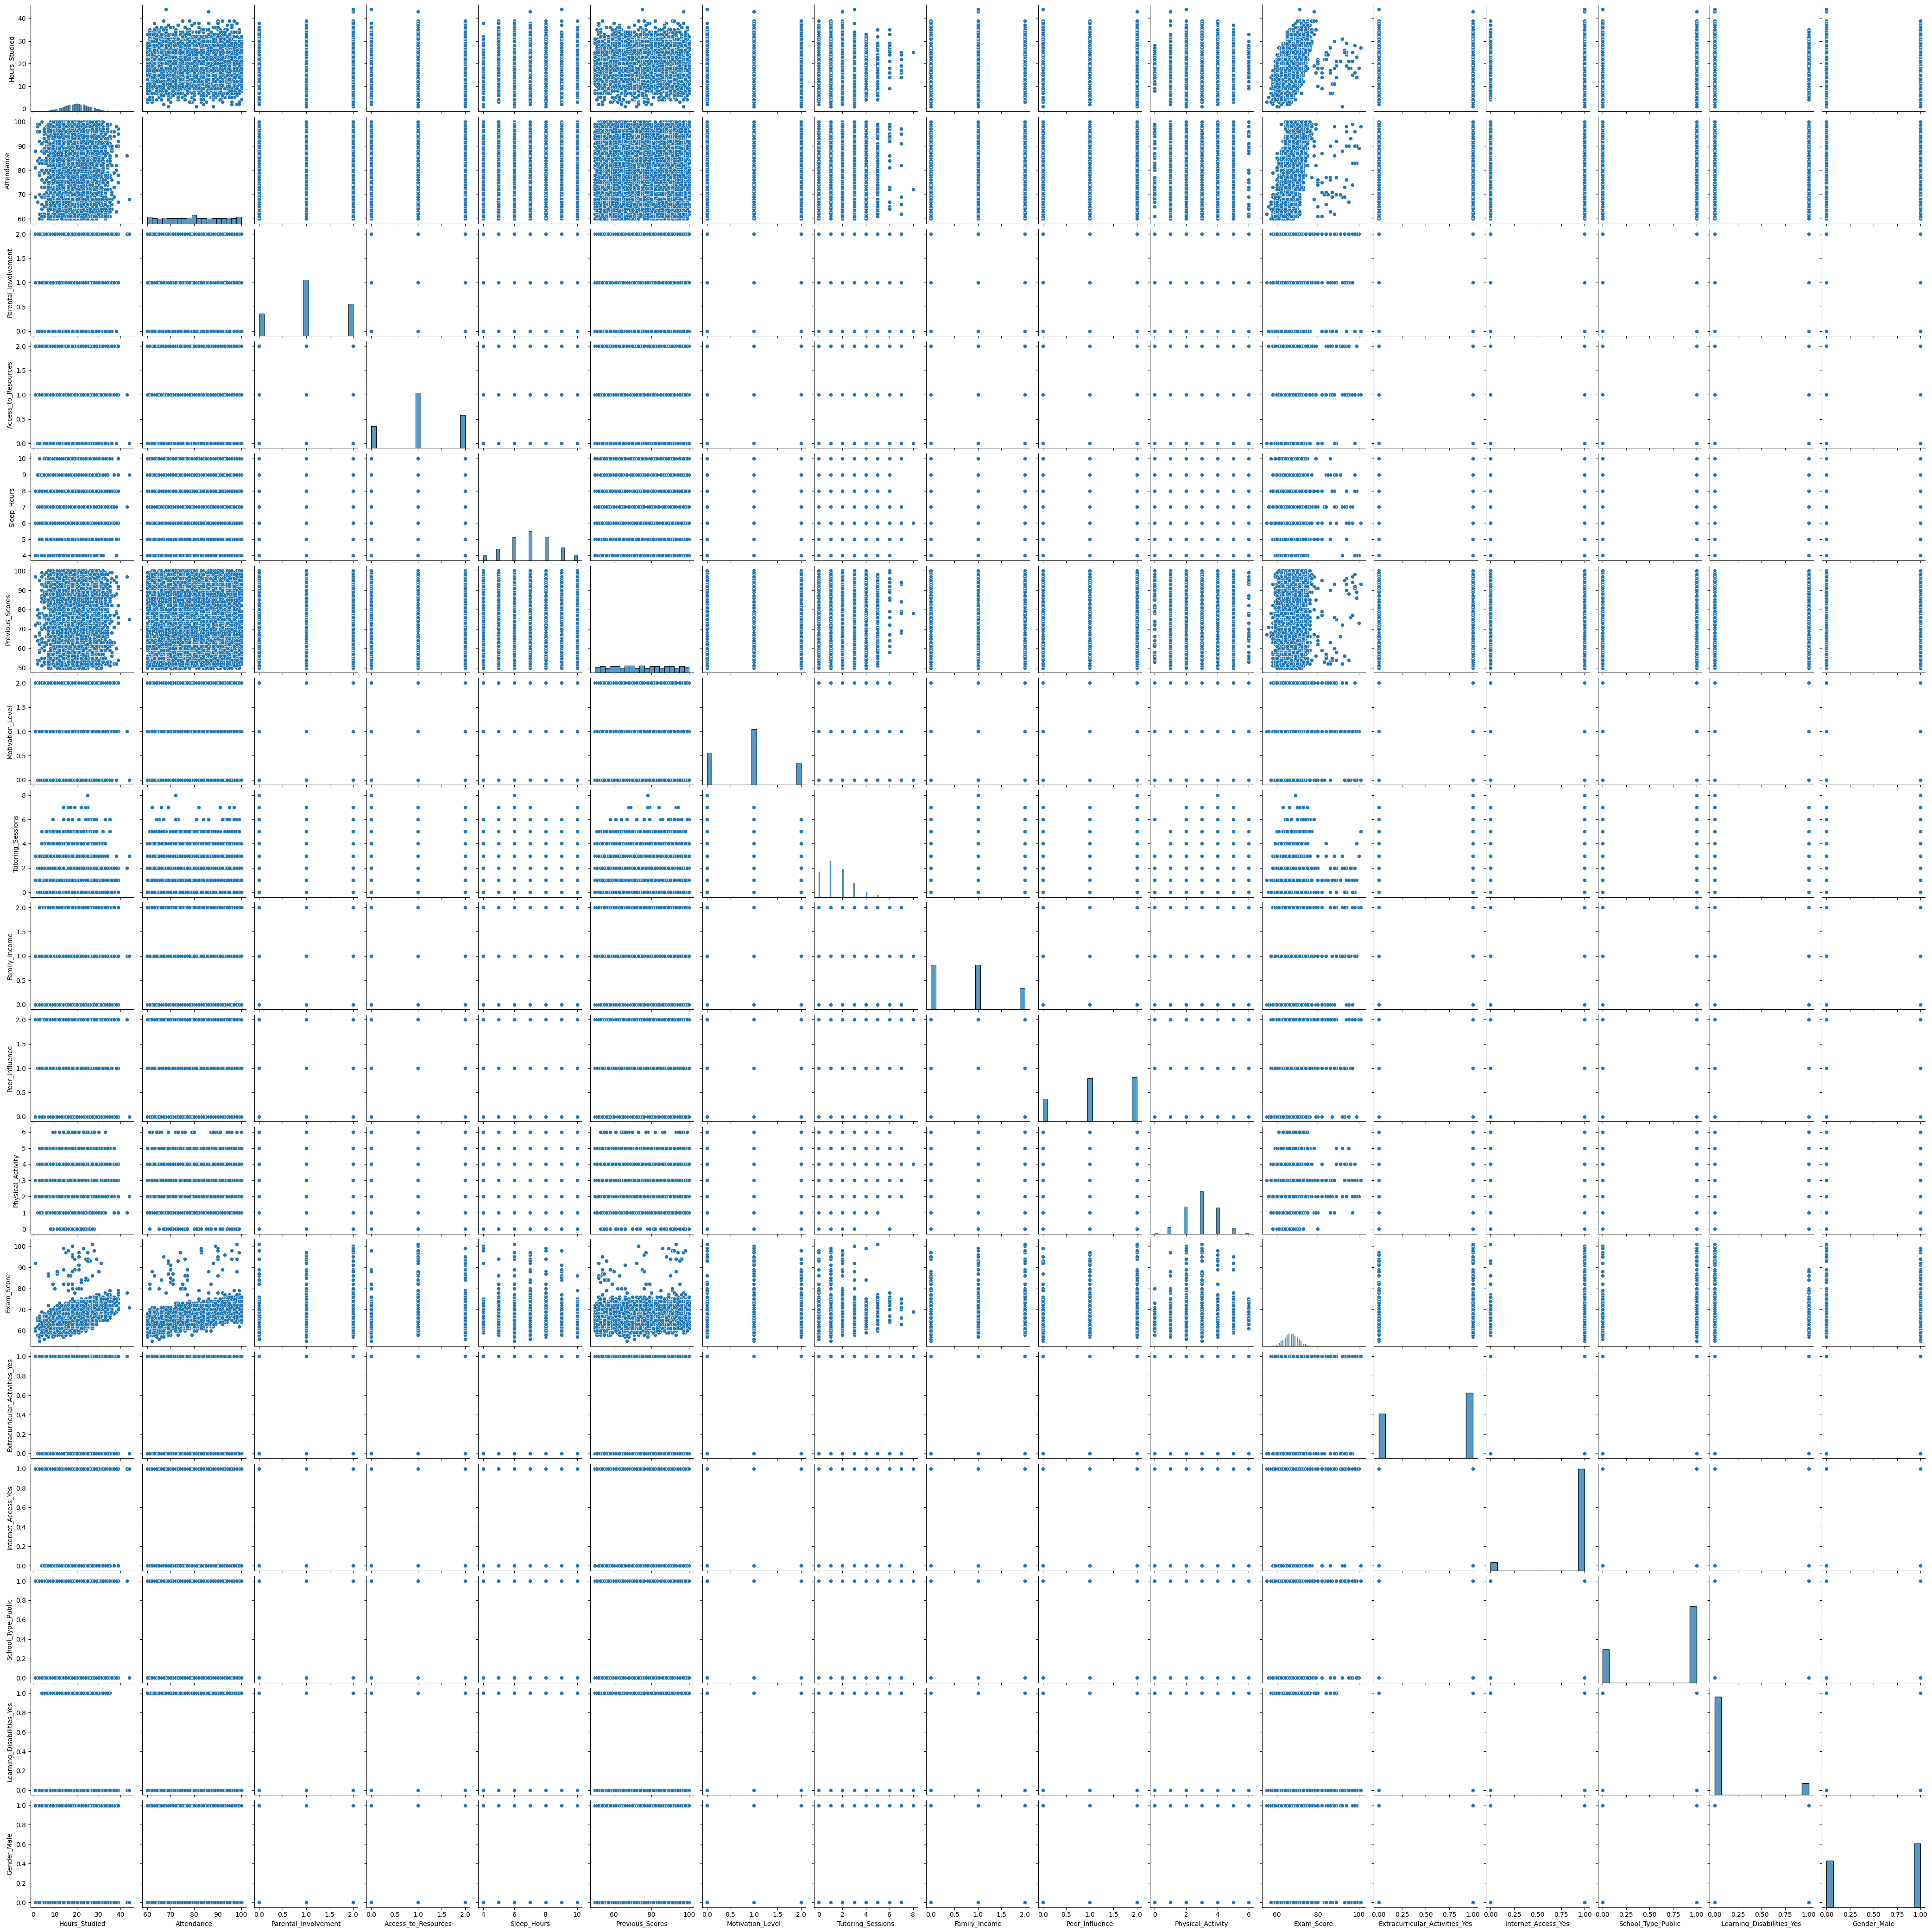

In [442]:
sns.pairplot(df, diag_kind='hist')
plt.show()

displaying how features are correlated to each other  the vif result

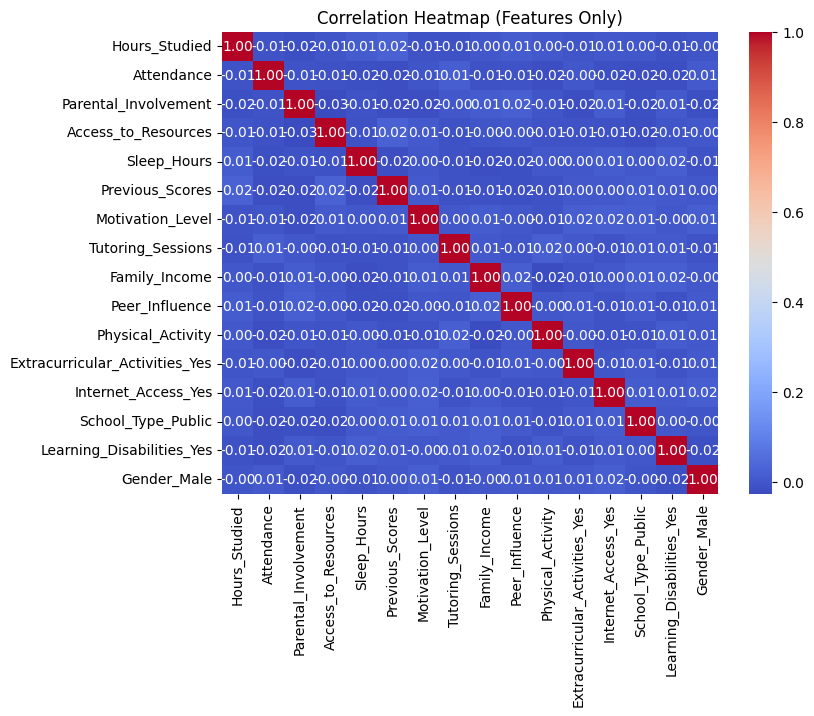

In [443]:
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Features Only)")
plt.show()

In [444]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming X is your feature DataFrame after encoding & scaling
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))


                           feature        VIF
1                       Attendance  32.010373
5                  Previous_Scores  22.928150
4                      Sleep_Hours  20.055379
12             Internet_Access_Yes  12.196043
0                    Hours_Studied  11.316773
10               Physical_Activity   8.695176
9                   Peer_Influence   3.421347
3              Access_to_Resources   3.418050
2             Parental_Involvement   3.373429
13              School_Type_Public   3.244319
6                 Motivation_Level   2.675476
11  Extracurricular_Activities_Yes   2.453378
7                Tutoring_Sessions   2.451277
15                     Gender_Male   2.350383
8                    Family_Income   2.106996
14       Learning_Disabilities_Yes   1.118773


it seems that the vif is super high in some features  , so we gonna drop attendance feature 

In [445]:
# CELL 1 — (Optional) Quick check of your current features
# Confirms 'Attendance' is present before we drop it.
print("X shape:", X.shape)
print("Columns in X:", list(X.columns))

X shape: (6607, 16)
Columns in X: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Tutoring_Sessions', 'Family_Income', 'Peer_Influence', 'Physical_Activity', 'Extracurricular_Activities_Yes', 'Internet_Access_Yes', 'School_Type_Public', 'Learning_Disabilities_Yes', 'Gender_Male']


Make a safe backup copy of your features , so we can restore any column later without reloading the raw dataset.

In [446]:
X_original = X.copy(deep=True)
print("Backup created: X_original (same shape as X):", X_original.shape)

Backup created: X_original (same shape as X): (6607, 16)


dropping attendance 

In [447]:
X_working = X_original.drop(columns=['Attendance'])
print("Dropped 'Attendance'. New shape:", X_working.shape)

Dropped 'Attendance'. New shape: (6607, 15)


Verifing the change

In [448]:
removed = set(X_original.columns) - set(X_working.columns)
kept    = set(X_working.columns)
print("Removed columns:", removed)
print("Kept columns (count={}):".format(len(kept)))
print(sorted(list(kept))[:10], "...")  # show first 10

Removed columns: {'Attendance'}
Kept columns (count=15):
['Access_to_Resources', 'Extracurricular_Activities_Yes', 'Family_Income', 'Gender_Male', 'Hours_Studied', 'Internet_Access_Yes', 'Learning_Disabilities_Yes', 'Motivation_Level', 'Parental_Involvement', 'Peer_Influence'] ...


In [449]:
# Cell: Recalculate VIF after dropping Attendance

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Create a DataFrame to store VIF values for the current working dataset
vif_data = pd.DataFrame()
vif_data["feature"] = X_working.columns
vif_data["VIF"] = [variance_inflation_factor(X_working.values, i) for i in range(len(X_working.columns))]

vif_data

,feature,VIF
0,Hours_Studied,10.926677
1,Parental_Involvement,3.339573
2,Access_to_Resources,3.389284
3,Sleep_Hours,18.227212
4,Previous_Scores,20.493626
5,Motivation_Level,2.663211
6,Tutoring_Sessions,2.429999
7,Family_Income,2.099260
8,Peer_Influence,3.391593
9,Physical_Activity,8.463739


vif is still high 

In [450]:
print("Features in X_working:", X_working.columns.tolist())
print("Shape:", X_working.shape)

Features in X_working: ['Hours_Studied', 'Parental_Involvement', 'Access_to_Resources', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Tutoring_Sessions', 'Family_Income', 'Peer_Influence', 'Physical_Activity', 'Extracurricular_Activities_Yes', 'Internet_Access_Yes', 'School_Type_Public', 'Learning_Disabilities_Yes', 'Gender_Male']
Shape: (6607, 15)


Merging Hours_Studied and Sleep_Hours into a new feature

In [451]:
X_working["Study_Habits"] = X_working["Hours_Studied"] + X_working["Sleep_Hours"]

Dropping the old features

In [452]:
X_working = X_working.drop(columns=["Hours_Studied", "Sleep_Hours"])

In [453]:
# Check new shape and columns
print("X_working shape:", X_working.shape)
print(X_working.columns.tolist()[:15])  # preview first 15 columns

X_working shape: (6607, 14)
['Parental_Involvement', 'Access_to_Resources', 'Previous_Scores', 'Motivation_Level', 'Tutoring_Sessions', 'Family_Income', 'Peer_Influence', 'Physical_Activity', 'Extracurricular_Activities_Yes', 'Internet_Access_Yes', 'School_Type_Public', 'Learning_Disabilities_Yes', 'Gender_Male', 'Study_Habits']


recalculate the vif to check the change 

In [454]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_working.columns

vif_data["VIF"] = [
    variance_inflation_factor(X_working.values, i)
    for i in range(X_working.shape[1])
]

print(vif_data)


                           feature        VIF
0             Parental_Involvement   3.320401
1              Access_to_Resources   3.376205
2                  Previous_Scores  19.386904
3                 Motivation_Level   2.654560
4                Tutoring_Sessions   2.423763
5                    Family_Income   2.097151
6                   Peer_Influence   3.381930
7                Physical_Activity   8.311590
8   Extracurricular_Activities_Yes   2.433199
9              Internet_Access_Yes  11.405473
10              School_Type_Public   3.215245
11       Learning_Disabilities_Yes   1.117718
12                     Gender_Male   2.332964
13                    Study_Habits  15.701283


good now we did fix the vif as much as we could we move on 

##SPLITING DATA INTO TRAIN , TEST 

In [455]:
X_train, X_test, y_train, y_test = train_test_split(
    X_working, y, test_size=0.2, random_state=42
)

TRAIN THE LR MODEL

In [456]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


predection 

In [457]:
# Predict on training and test sets
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

print("Predictions complete.")

Predictions complete.


evaluatoin

In [458]:
# Training performance
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

# Testing performance
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Training R²:", train_r2)
print("Testing RMSE:", test_rmse)
print("Testing R²:", test_r2)

Training RMSE: 3.1990498432091603
Training R²: 0.3346372425833454
Testing RMSE: 3.0081643659232666
Testing R²: 0.35981560266777535


visualizing the feature study haits 

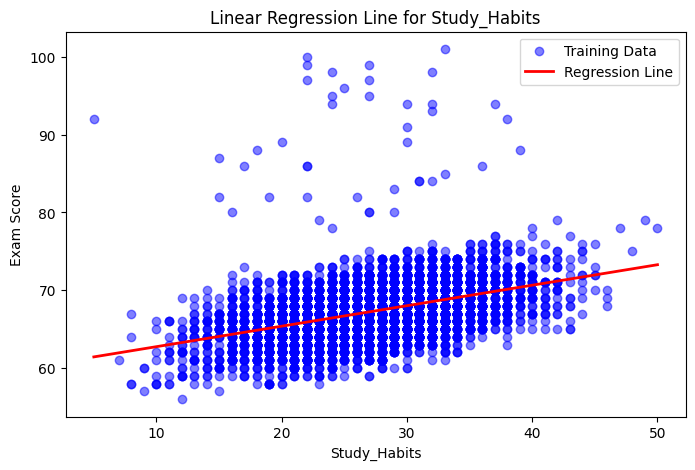

In [459]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Pick the merged feature "Study_Habits"
feature_name = "Study_Habits"
feature_index = list(X_train.columns).index(feature_name)

# Extract that single feature
X_train_single = X_train.iloc[:, feature_index].values.reshape(-1, 1)
y_train_single = y_train

# Train a simple linear regression only on this feature
lin_reg_single = LinearRegression()
lin_reg_single.fit(X_train_single, y_train_single)

# Predictions for drawing the line
x_range = np.linspace(X_train_single.min(), X_train_single.max(), 100).reshape(-1, 1)
y_pred_line = lin_reg_single.predict(x_range)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_train_single, y_train, color="blue", alpha=0.5, label="Training Data")
plt.plot(x_range, y_pred_line, color="red", linewidth=2, label="Regression Line")
plt.xlabel(feature_name)
plt.ylabel("Exam Score")
plt.title(f"Linear Regression Line for {feature_name}")
plt.legend()
plt.show()


we need to strength the model , first we will start by making a backup of the dataset for second time to save what we have 

In [460]:
# BACKUP your current working features (after your cleaning/merging)
backup2 = X_working.copy()
print("backup2 made. Shape:", backup2.shape)
backup2.head(3)


backup2 made. Shape: (6607, 14)


,Parental_Involvement,Access_to_Resources,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Peer_Influence,Physical_Activity,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Learning_Disabilities_Yes,Gender_Male,Study_Habits
0,0,2,73,0,0,0,2,3,0,1,1,0,1,30
1,0,1,59,0,2,1,0,4,0,1,1,0,0,27
2,1,1,91,1,2,1,1,4,1,1,1,0,1,31


getting back the lr model 

In [461]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [462]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Test R²:", r2_score(y_test, y_test_pred))


Train RMSE: 3.1990498432091603
Train R²: 0.3346372425833454
Test RMSE: 3.0081643659232666
Test R²: 0.35981560266777535


the drop and split , now all features at X_cleaned

In [463]:
# Step 1: Drop high-VIF features from the full dataset
X_cleaned = X_working.drop(columns=['Previous_Scores', 'Study_Habits', 'Internet_Access_Yes'])

# Step 2: Split the cleaned data
X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y, test_size=0.2, random_state=42
)


In [464]:
print("Remaining features:", X_cleaned.columns.tolist())

Remaining features: ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Tutoring_Sessions', 'Family_Income', 'Peer_Influence', 'Physical_Activity', 'Extracurricular_Activities_Yes', 'School_Type_Public', 'Learning_Disabilities_Yes', 'Gender_Male']


scalling features

In [465]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the cleaned features
X_scaled = scaler.fit_transform(X_cleaned)


train again

In [466]:
from sklearn.linear_model import LinearRegression
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

prediction

In [467]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

eval

In [468]:
# Evaluate performance
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

dropping the categorical features keeping only the original numerical and check the model peformance , these steps in order for strengthing the model 

the current feature list

In [469]:
current_features = [
    'Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources',
    'Sleep_Hours', 'Motivation_Level', 'Tutoring_Sessions', 'Family_Income',
    'Peer_Influence', 'Physical_Activity', 'Extracurricular_Activities_Yes',
    'School_Type_Public', 'Learning_Disabilities_Yes', 'Gender_Male'
]

Keywords to drop (partial matches allowed)

In [470]:
drop_keywords = [
    'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level',
    'Internet_Access', 'Family_Income', 'School_Type',
    'Peer_Influence', 'Learning_Disabilities', 'Gender'
]

Drop features that match any keyword

In [471]:
filtered_features = [
    feat for feat in current_features
    if not any(keyword in feat for keyword in drop_keywords)
]
# Display remaining features
print("Remaining features:")
for f in filtered_features:
    print(f"- {f}")

Remaining features:
- Hours_Studied
- Attendance
- Parental_Involvement
- Sleep_Hours
- Tutoring_Sessions
- Physical_Activity


In [472]:
# 1. Filter your DataFrame to keep only selected features
selected_features = [
    'Hours_Studied', 'Attendance', 'Parental_Involvement',
    'Sleep_Hours', 'Tutoring_Sessions', 'Physical_Activity'
]
X_filtered = X[selected_features]
y_target = y  # Replace with your actual target variable

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_target, test_size=0.2, random_state=42)

# 3. Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 5. Evaluate
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 6. Display results
print(f"📚 Train RMSE: {train_rmse:.4f}")
print(f"📚 Train R²: {train_r2:.4f}")
print(f"🧪 Test RMSE: {test_rmse:.4f}")
print(f"🧪 Test R²: {test_r2:.4f}")


📚 Train RMSE: 2.5252
📚 Train R²: 0.5854
🧪 Test RMSE: 2.2590
🧪 Test R²: 0.6390


Visualize Predictions (Actual vs. Predicted)

/tmp/ipykernel_36/4279925522.py:13: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



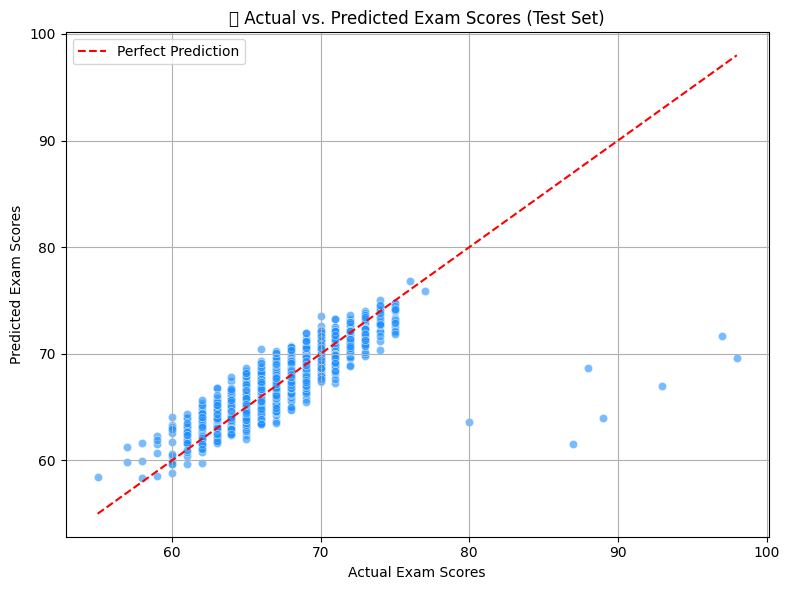

In [473]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization: Actual vs Predicted on Test Set
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color='dodgerblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("📊 Actual vs. Predicted Exam Scores (Test Set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Tabular Evaluation Summary

In [474]:
# Tabular summary of evaluation metrics
evaluation_summary = pd.DataFrame({
    'Set': ['Train', 'Test'],
    'RMSE': [train_rmse, test_rmse],
    'R²': [train_r2, test_r2]
})

print("📋 Model Evaluation Summary:")
print(evaluation_summary.round(4))


📋 Model Evaluation Summary:
     Set    RMSE      R²
0  Train  2.5252  0.5854
1   Test  2.2590  0.6390
